In [126]:
# Main
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(16, 5)})
# %matplotlib ipympl

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

In [2]:
raw_data = pd.read_csv("house_train.csv")

In [3]:
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
raw_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Удалим дубликаты, а также неинформативную колонку "Id"

In [5]:
raw_data.drop_duplicates(inplace=True, ignore_index=True)
raw_data.drop("Id", axis=1, inplace=True)

Посмотрим основную информацию о DF

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
def size_of_df(data):
    print(f"| {data.shape[0]} rows, {data.shape[1]} columns \n| {data.size} elements \n| {round(data.memory_usage().sum()/1048576, 1)} Mb")

In [8]:
size_of_df(raw_data)

| 1460 rows, 80 columns 
| 116800 elements 
| 0.9 Mb


Также посмотрим более подробную информацию о DF

In [9]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [10]:
# Функция для отображения основной информации о DF
def data_info(data, set_color=False, count_values=2): # (DF, выделение основной инф. цветом, кол-во уник. значений для показа)
    #  most popular unique values in DF
    unique_data = [data[x].value_counts().index[:count_values] for x in data.columns]
    unique_res_data = pd.DataFrame()
    for index, x in enumerate(data.columns):
        unique_res_data[x] = unique_data[index] 
        
    #  create new DF with all information about our DF - unique values, data types, num. unique values, num. NAs    
    df_info = pd.concat([unique_res_data, 
                     pd.DataFrame(data.dtypes).T, 
                     pd.DataFrame(data.nunique()).T, 
                     pd.DataFrame(data.isna().sum()).T], ignore_index=True)
    temp_val = df_info.shape[0]
    df_info.rename(index={temp_val-3:"type", 
                          temp_val-2:"num_unique", 
                          temp_val-1:"is_na"}, inplace=True)
    
#     # for convenience highlight the information in color
    if set_color:
        props = [("background-color", "lavender"), ("color", "black")]
        df_info = df_info.style.set_table_styles({"type": [{"selector": "", "props": props}],
                                          "num_unique": [{"selector": '', "props": props}],
                                          "is_na": [{"selector": "", "props": props}]}, 
                                          axis=1, 
                                          overwrite=False)
    return(df_info)

In [11]:
data_info(raw_data, True)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,60.000000,7200,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,2006,1950,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,0,0,GasA,Ex,Y,SBrkr,864,0,0,864,0,0,2,0,3,1,TA,6,Typ,0,Gd,Attchd,2005.000000,Unf,2,0,TA,TA,Y,0,0,0,0,0,0,Gd,MnPrv,Shed,0,6,2009,WD,Normal,140000
1,60,RM,70.000000,9600,Grvl,Pave,IR1,Bnk,NoSeWa,Corner,Mod,CollgCr,Feedr,Feedr,TwnhsE,2Story,6,6,2005,2006,Hip,Tar&Grv,HdBoard,MetalSd,BrkFace,108.000000,Gd,Gd,CBlock,Gd,Gd,Av,GLQ,24,Rec,180,728,864,GasW,TA,N,FuseA,1040,728,80,1040,1,1,1,1,2,2,Gd,7,Min2,1,TA,Detchd,2006.000000,RFn,1,440,Fa,Fa,N,192,36,112,168,192,480,Fa,GdPrv,Gar2,400,7,2007,New,Partial,135000
type,int64,object,float64,int64,object,object,object,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,object,object,object,object,float64,object,object,object,object,object,object,object,int64,object,int64,int64,int64,object,object,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,int64,object,int64,object,object,float64,object,int64,int64,object,object,object,int64,int64,int64,int64,int64,int64,object,object,object,int64,int64,int64,object,object,int64
num_unique,15,5,110,1073,2,2,4,4,2,5,3,25,9,8,5,8,10,9,112,61,6,8,15,16,4,327,4,5,6,4,4,4,6,637,6,144,780,721,6,5,2,5,753,417,24,861,4,3,4,3,8,4,4,12,7,4,5,6,97,3,5,441,5,5,3,274,202,120,20,76,8,3,4,4,21,12,5,9,6,663
is_na,0,0,259,0,0,1369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,0,0,0,37,37,38,37,0,38,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,690,81,81,81,0,0,81,81,0,0,0,0,0,0,0,1453,1179,1406,0,0,0,0,0,0


Видно, что в данных есть достаточное количество пропусков, а также много довольно похожих колонок и категориальных данных

In [12]:
# Функция для отображения отсутствующих данных  
def check_nan(data, percent=0.000000001, count_for_round=2, sorting=True): # (DF, % отсутствующих данных ([0, 1]), округление колонки %, сортировка)
#   проверка на присутствуие nan 
    if data.isna().sum().sum()==0: print("No NaN in DataFrame")
    else: 
        temp_df = pd.DataFrame(data.isna().sum()[data.isna().sum()>=data.shape[0]*percent], columns=["count_nan"])
        temp_df["percent_nan"] = round(temp_df/data.shape[0]*100, count_for_round)
        if sorting: return temp_df.sort_values("count_nan", ascending=False)
        else: return temp_df

In [13]:
check_nan(raw_data)

,count_nan,percent_nan
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55


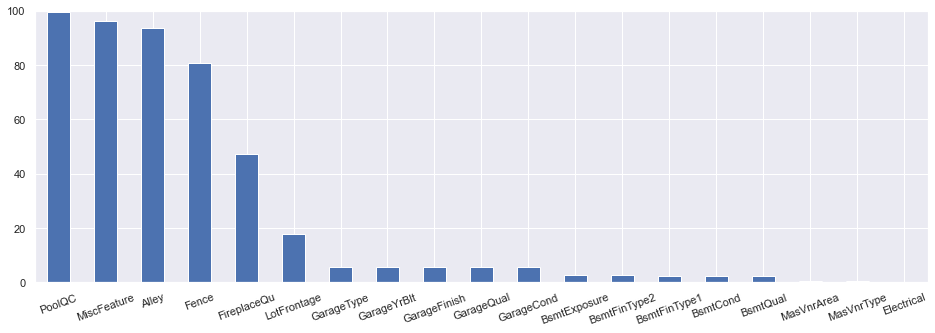

In [14]:
check_nan(raw_data)["percent_nan"].plot.bar(rot=20);
plt.ylim(0, 100);

Удалим колонки, в которых больше 80% пропусков, а также строки, в которых меньше 1% пропусков, и снова посмотрим на данные

In [15]:
data = raw_data.copy()
data.drop(data.isna().sum()[data.isna().sum()>data.shape[0]*0.8].index, axis=1, inplace=True)
data = data[~((data.MasVnrType.isna()) | (data.MasVnrArea.isna()) | (data.Electrical.isna()))]

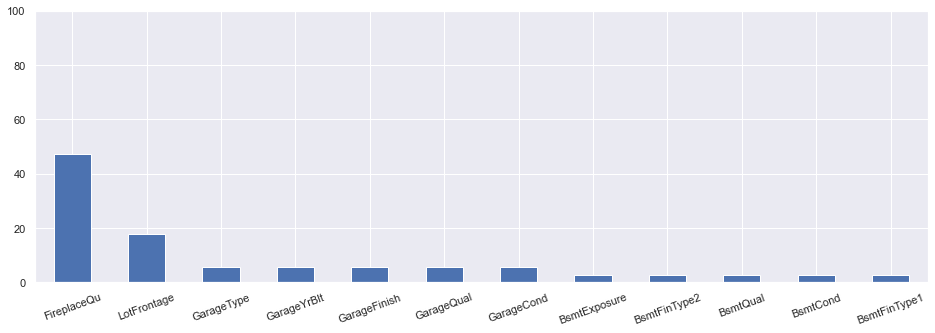

In [16]:
check_nan(data)["percent_nan"].plot.bar(rot=20);
plt.ylim(0, 100);

In [17]:
data_info(data[check_nan(data).index], count_values=3)

,FireplaceQu,LotFrontage,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,BsmtExposure,BsmtFinType2,BsmtQual,BsmtCond,BsmtFinType1
0,Gd,60.0,Attchd,2005.0,Unf,TA,TA,No,Unf,TA,TA,Unf
1,TA,70.0,Detchd,2006.0,RFn,Fa,Fa,Av,Rec,Gd,Gd,GLQ
2,Fa,80.0,BuiltIn,2004.0,Fin,Gd,Gd,Gd,LwQ,Ex,Fa,ALQ
type,object,float64,object,float64,object,object,object,object,object,object,object,object
num_unique,5,110,6,97,3,5,5,4,6,4,4,6
is_na,685,257,81,81,81,81,81,38,38,37,37,37


In [18]:
for col in ['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtFinType1', 'GarageCond']:
    data[col].fillna("None", inplace=True)
    
data['GarageYrBlt'].fillna(0, inplace=True) 

data['LotFrontage'].fillna(data['LotFrontage'].mode()[0], inplace=True)

In [19]:
check_nan(data)

No NaN in DataFrame


Заменим оставшиеся пропуски самыми частыми значениями

In [20]:
# nan_cols = check_nan(data).index
# for col in nan_cols:
#     data[col].fillna(data[col].mode()[0], inplace=True)

In [21]:
# check_nan(data)

Теперь нужно изменить некоторые типы данных 

In [22]:
data_info(data, True)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,60.000000,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,2006,1950,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,0,0,GasA,Ex,Y,SBrkr,864,0,0,864,0,0,2,0,3,1,TA,6,Typ,0,None,Attchd,0.000000,Unf,2,0,TA,TA,Y,0,0,0,0,0,0,0,6,2009,WD,Normal,140000
1,60,RM,70.000000,9600,Grvl,IR1,Bnk,NoSeWa,Corner,Mod,CollgCr,Feedr,Feedr,TwnhsE,2Story,6,6,2005,2006,Hip,Tar&Grv,HdBoard,MetalSd,BrkFace,108.000000,Gd,Gd,CBlock,Gd,Gd,Av,GLQ,24,Rec,180,728,864,GasW,TA,N,FuseA,1040,728,80,1040,1,1,1,1,2,2,Gd,7,Min2,1,Gd,Detchd,2005.000000,RFn,1,440,None,None,N,192,36,112,168,192,480,400,7,2007,New,Partial,135000
type,int64,object,float64,int64,object,object,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,object,object,object,object,float64,object,object,object,object,object,object,object,int64,object,int64,int64,int64,object,object,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,int64,object,int64,object,object,float64,object,int64,int64,object,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,object,int64
num_unique,15,5,110,1066,2,4,4,2,5,3,25,9,8,5,8,10,9,112,61,6,8,15,16,4,327,4,5,6,5,5,5,7,633,7,144,777,717,6,5,2,5,748,414,24,858,4,3,4,3,8,4,4,12,7,4,6,7,98,4,5,438,6,6,3,274,201,119,20,76,8,21,12,5,9,6,657
is_na,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Нужно проверить столбцы LotFrontage (float->int), MasVnrArea (float->int), GarageYrBlt (float->int)

In [23]:
# LotFrontage, MasVnrArea, GarageYrBl
print("LotFrontage: ", (data.LotFrontage%1).sum())
print("MasVnrArea: ", (data.MasVnrArea%1).sum())
print("GarageYrBlt: ", (data.GarageYrBlt%1).sum())

LotFrontage:  0.0
MasVnrArea:  0.0
GarageYrBlt:  0.0


In [24]:
# Т.к. в данных нет значений после запятой, изменим типы данных на integer
data[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']] = data[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].astype("int")

Сравним размеры исходных и полученных данных

In [25]:
size_of_df(raw_data)

| 1460 rows, 80 columns 
| 116800 elements 
| 0.9 Mb


In [26]:
size_of_df(data)

| 1451 rows, 76 columns 
| 110276 elements 
| 0.8 Mb


После подготовки можно перейти к анализу данных и построению графиков. Начнем с целевой функции

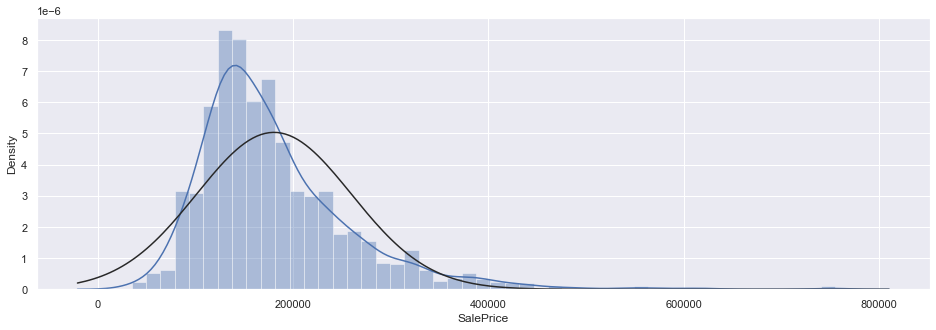

In [27]:
from scipy.stats import norm, skew
sns.distplot(data.SalePrice, fit=norm);

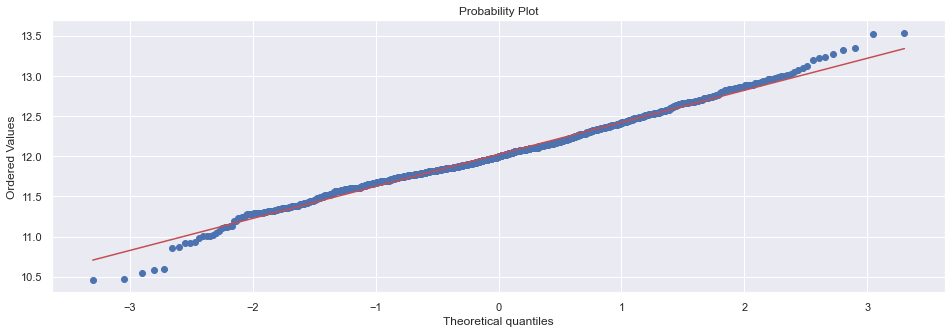

In [28]:
from scipy import stats
stats.probplot(np.log(data['SalePrice']), plot=plt);

In [29]:
data.SalePrice.describe()

count      1451.000000
mean     180624.101999
std       79312.128273
min       34900.000000
25%      129900.000000
50%      162500.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [30]:
data.SalePrice.skew(), data.SalePrice.kurtosis()

(1.8831110462405252, 6.573025006423077)

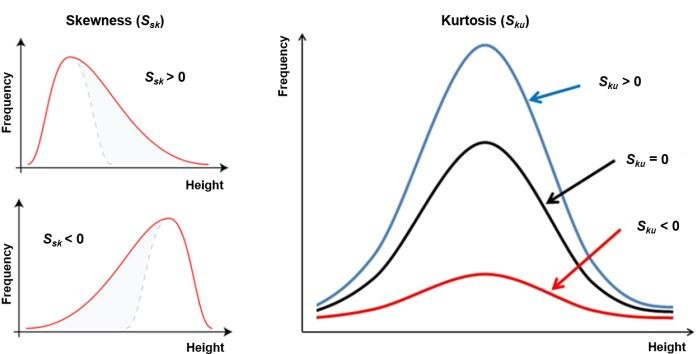

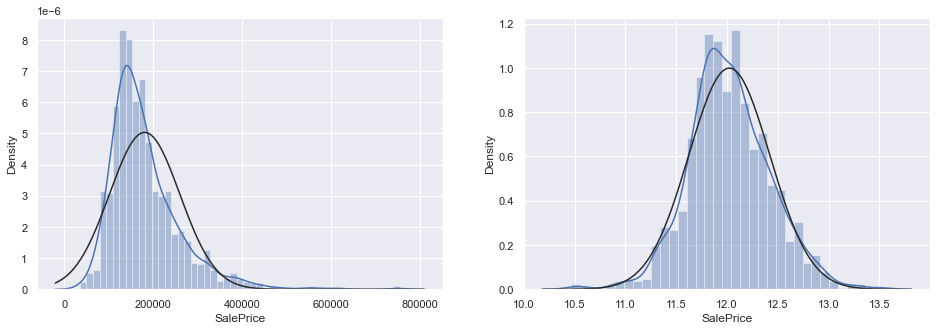

In [31]:
fig, ax  = plt.subplots(1, 2);
sns.distplot(data.SalePrice, ax=ax[0], fit=norm);
sns.distplot(np.log1p(data.SalePrice), ax=ax[1], fit=norm);

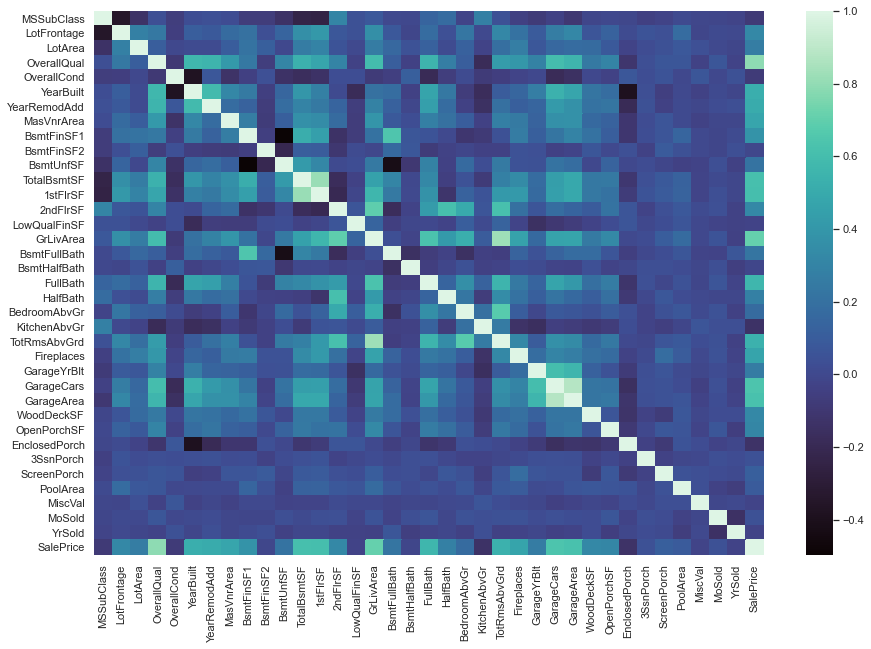

In [32]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), cmap="mako");

<AxesSubplot:>

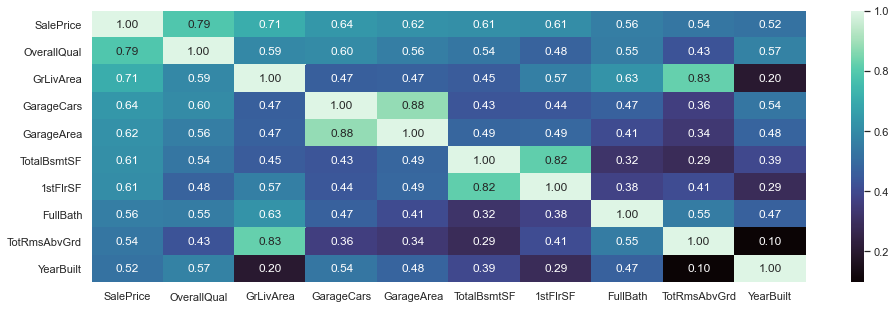

In [33]:
cols = data.corr().nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
# sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', yticklabels=cols.values, xticklabels=cols.values, cmap="mako")

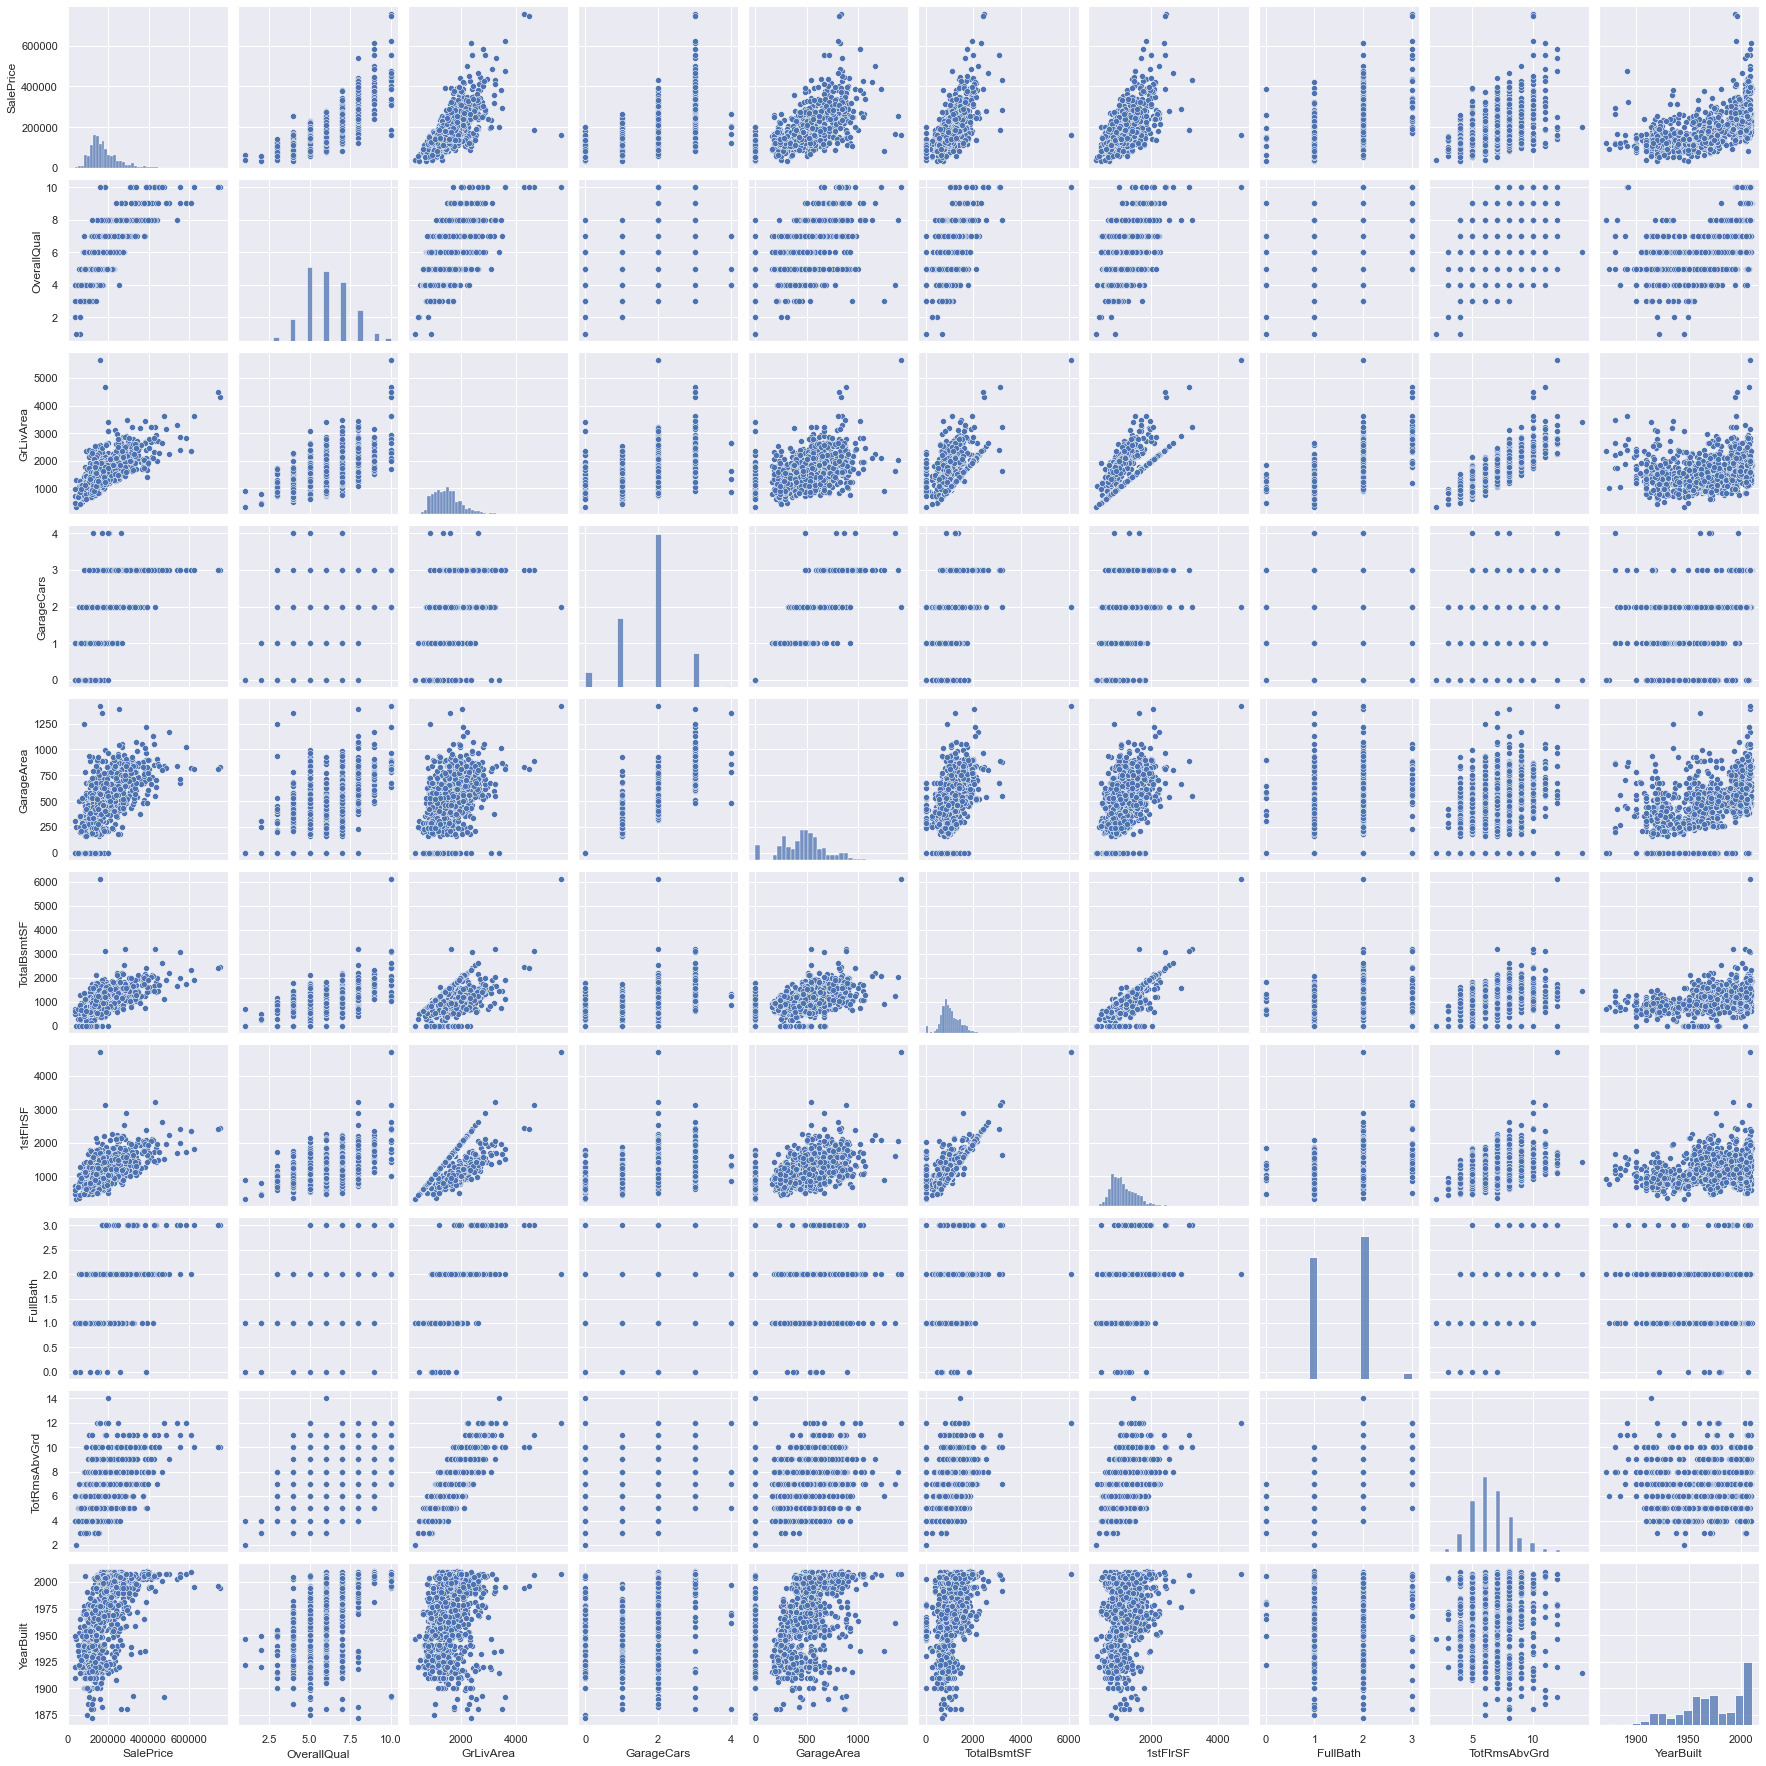

In [34]:
sns.pairplot(data[cols]);

In [35]:
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

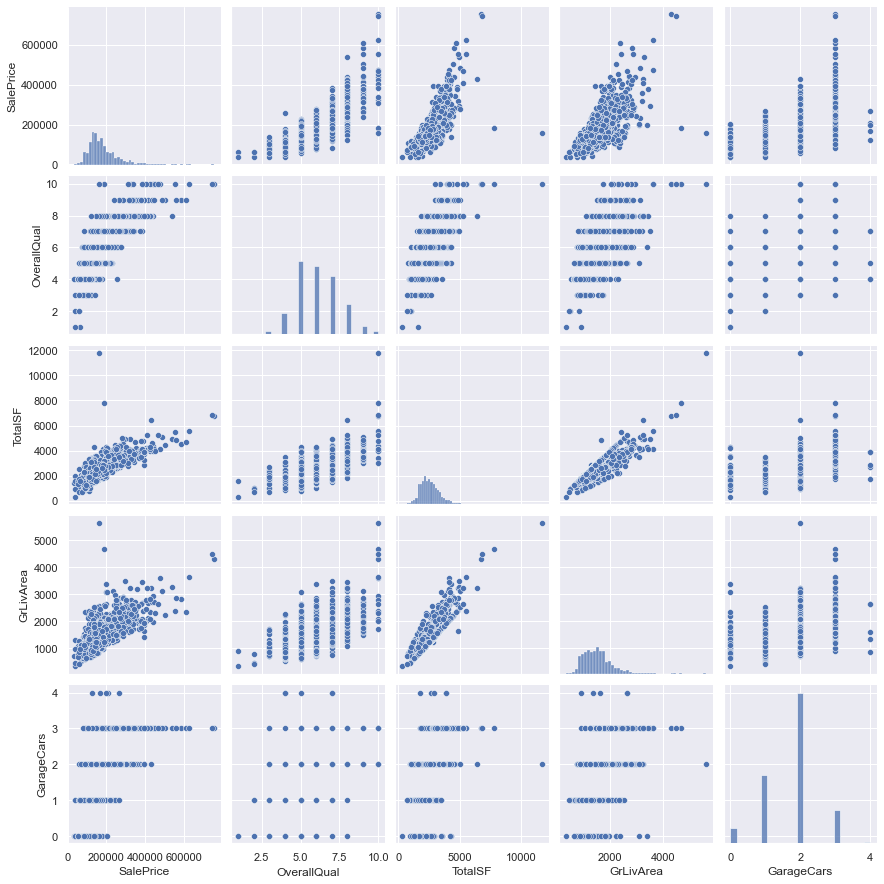

In [36]:
cols5 = data.corr().nlargest(5, 'SalePrice')['SalePrice'].index
sns.pairplot(data[cols5]);

<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>

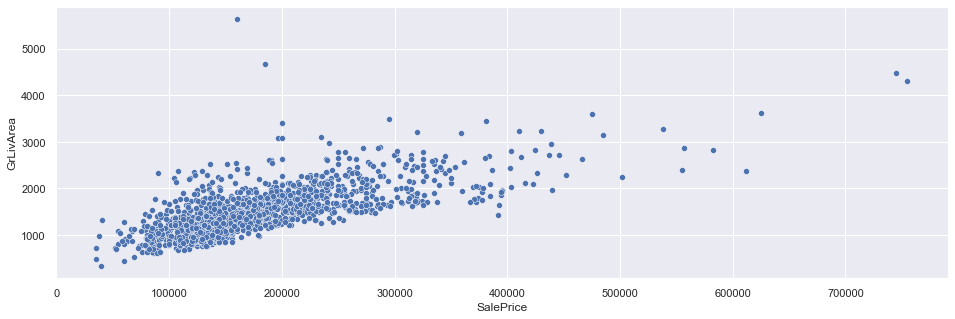

In [37]:
sns.scatterplot(data.SalePrice, data.GrLivArea)

In [38]:
data = data[(data.SalePrice<700000) & (data.GrLivArea<4000)]

<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>

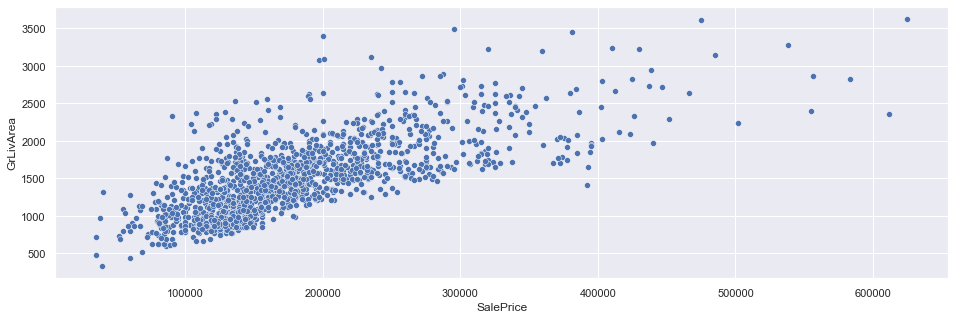

In [39]:
sns.scatterplot(data.SalePrice, data.GrLivArea)

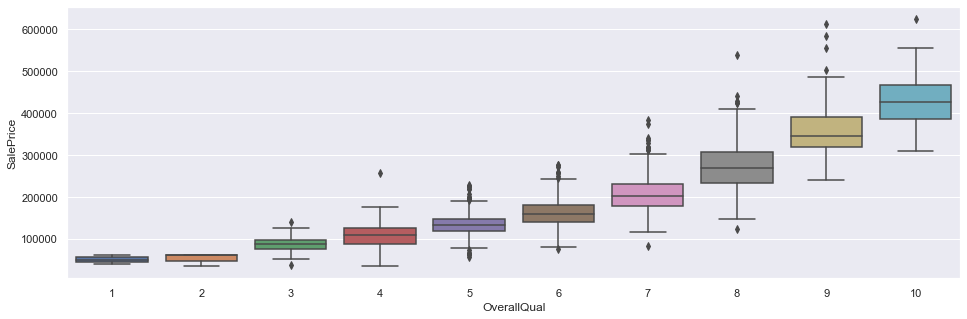

In [40]:
sns.boxplot(data=data, x="OverallQual", y="SalePrice");

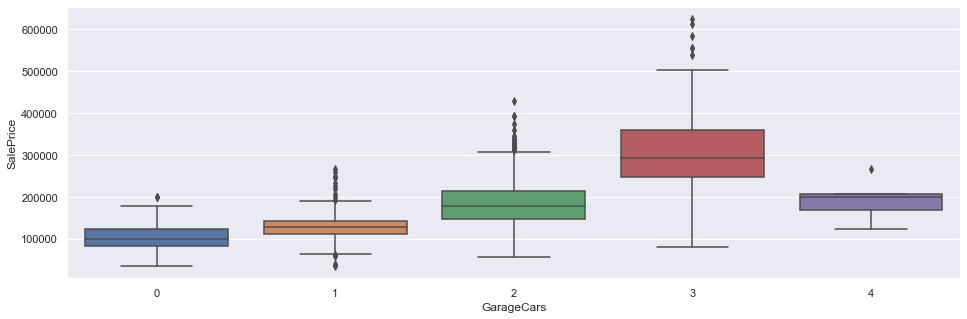

In [41]:
sns.boxplot(data=data, x="GarageCars", y="SalePrice");

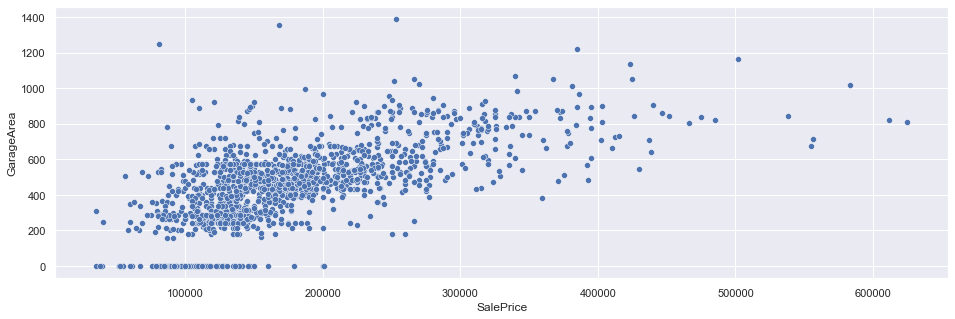

In [42]:
sns.scatterplot(data.SalePrice, data.GarageArea);

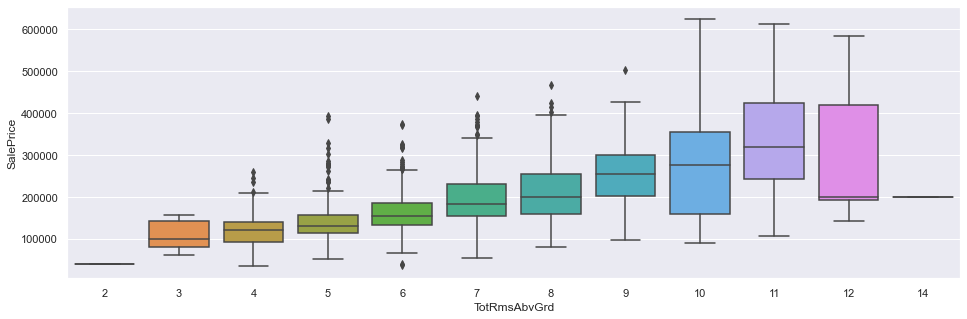

In [43]:
sns.boxplot(data=data, x="TotRmsAbvGrd", y="SalePrice");

## Feature Engineering

In [44]:
from scipy.stats import shapiro, ttest_ind
room_4_norm = shapiro(data[data["TotRmsAbvGrd"]==4].GrLivArea)
room_4_pv = room_4_norm.pvalue
room_5_norm = shapiro(data[data["TotRmsAbvGrd"]==5].GrLivArea)
room_5_pv = room_5_norm.pvalue
print(round(room_4_pv, 4), round(room_5_pv, 4))
# t_test = ttest_ind(data[data["TotRmsAbvGrd"]==5].GrLivArea, data[data["TotRmsAbvGrd"]==4].GrLivArea)

0.0051 0.0


Многие данные не имеют нормальное распределение, однако для некоторых алгоритмов МО это важное условие, поэтому исправим это с помощью преобразования Бокса-Кокса

In [45]:
numeric_feats = data.select_dtypes("number").columns
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness

,Skew
MiscVal,24.342712
PoolArea,17.449842
LotArea,12.605477
3SsnPorch,10.246583
LowQualFinSF,8.960448
KitchenAbvGr,4.501042
BsmtFinSF2,4.229142
BsmtHalfBath,4.109774
ScreenPorch,4.096562
EnclosedPorch,3.085343


In [46]:
from scipy.special import boxcox, boxcox1p

skewness = skewness[abs(skewness) > 0.75]
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    data[feat] = boxcox1p((data[feat]), lam)

In [47]:
data[skewed_features].head()

,MiscVal,PoolArea,LotArea,3SsnPorch,LowQualFinSF,KitchenAbvGr,BsmtFinSF2,BsmtHalfBath,ScreenPorch,EnclosedPorch,...,BedroomAbvGr,MoSold,OverallQual,GarageArea,YrSold,FullBath,GarageCars,YearRemodAdd,YearBuilt,GarageYrBlt
0,0.0,0.0,19.212182,0.0,0.0,0.730463,0.0,0.000000,0.0,0.000000,...,1.540963,1.194318,2.440268,10.506271,14.195323,1.194318,1.194318,14.187527,14.187527,14.187527
1,0.0,0.0,19.712205,0.0,0.0,0.730463,0.0,0.730463,0.0,0.000000,...,1.540963,2.055642,2.259674,10.062098,14.193765,1.194318,1.194318,14.145138,14.145138,14.145138
2,0.0,0.0,20.347241,0.0,0.0,0.730463,0.0,0.000000,0.0,0.000000,...,1.540963,2.750250,2.440268,10.775536,14.195323,1.194318,1.194318,14.185966,14.184404,14.184404
3,0.0,0.0,19.691553,0.0,0.0,0.730463,0.0,0.000000,0.0,8.797736,...,1.540963,1.194318,2.440268,10.918253,14.192207,0.730463,1.540963,14.135652,14.047529,14.179714
4,0.0,0.0,21.325160,0.0,0.0,0.730463,0.0,0.000000,0.0,0.000000,...,1.820334,3.128239,2.602594,11.627708,14.195323,1.194318,1.540963,14.182841,14.182841,14.182841


In [48]:
def find_cat(data, nunique=10):
    s=list(data.select_dtypes("object").columns)
    for col in list(data.select_dtypes("number").columns):
        if data[col].nunique()<nunique: s.append(col)
    return s


def col_mean(data, cat_feature, target):
    mn = data.groupby(cat_feature)[target].mean()
    return data[cat_feature].map(mn)


for col in find_cat(data):
    data[col+"_mean"] =  col_mean(data, col, 'SalePrice')

In [49]:
data['haspool'] = data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
data['has2ndfloor'] = data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
data['hasgarage'] = data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
data['hasbsmt'] = data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
data['hasfireplace'] = data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [50]:
data = pd.get_dummies(data)

In [51]:
data.drop_duplicates(inplace=True)
size_of_df(data)

| 1447 rows, 341 columns 
| 493427 elements 
| 1.4 Mb


In [52]:
# data.columns.difference(find_cat(data))

## Models

In [53]:
X = data.drop("SalePrice", axis=1)
y = data.SalePrice

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22, test_size=0.3, shuffle=True)
MSE = make_scorer(mean_squared_error, greater_is_better=False)

### XGB

Best Params for XGB:
 {'colsample_bytree': 0.7, 'gamma': 1.2, 'learning_rate': 0.08, 'max_depth': 6, 'min_child_weight': 11, 'subsample': 0.9}

Best CV Score: 0.5394422316295431

### RandomForest

Best Params: {'max_depth': 17, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 132, 'oob_score': False}

Best CV Score: 0.6864254654822102

### Ridge 

Best Params: {'alpha': 18}

Best CV Score: 0.4731180891212319

### Support Vector Regressor

Best Params: {'svr__C': 43, 'svr__epsilon': 0.3, 'svr__gamma': 0.00036}

Best CV Score: 0.4731180891212319

### LGBM Regressor

Best Params: {'learning_rate': 0.008, 'n_estimators': 3000, 'num_leaves': 6}

Best CV Score: 0.5018455499167603

### Gradient Boosting

Best Params: {'min_samples_split': 5, 'min_samples_leaf': 20, 'max_depth': 3500, 'learning_rate': 0.01}

Best CV Score: 0.5005605880620678

### Lasso

Best Params: {'lasso__alpha': 0.004}

Best CV Score: 0.47984358495714874

### Elastic Net

Best Params: {'elasticnet__alpha': 0.006}

Best CV Score: 0.4775145374253553

## Stacking  

In [127]:
# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.008, 
                       n_estimators=3000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=22)

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.08,
                       n_estimators=6000,
                       max_depth=6,
                       min_child_weight=11,
                       gamma=1.2,
                       subsample=0.9,
                       colsample_bytree=0.7,
                       nthread=-1,
                       random_state=22)



# Ridge Regressor
ridge = make_pipeline(RobustScaler(), Ridge(alpha=18))

# Lasso
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.004))

# ElasticNet Reggressor
elasticNet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.006))

# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C=43, epsilon= 0.3, gamma=0.00036))

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=3500,
                                max_features='sqrt',
                                min_samples_leaf=20,
                                min_samples_split=5,
                                loss='huber',
                                random_state=42)  
    
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=132,
                          max_depth=17,
                          min_samples_split=3,
                          min_samples_leaf=2,
                          max_features=None,
                          oob_score=False,
                          random_state=22)

# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=(xgboost, lightgbm, svr, ridge, gbr, rf, elasticNet, lasso),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [129]:
lightgbm_model = lightgbm.fit(X_train, y_train)

In [130]:
xgboost_model = xgboost.fit(X_train, y_train)

In [131]:
ridge_model = ridge.fit(X_train, y_train)

In [132]:
lasso_model = lasso.fit(X_train, y_train)

In [133]:
elasticNet_model = elasticNet.fit(X_train, y_train)

In [134]:
svr_model = svr.fit(X_train, y_train)

In [135]:
gbr_model = gbr.fit(X_train, y_train)

In [136]:
rf_model = rf.fit(X_train, y_train)

In [128]:
stack_gen_model = stack_gen.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] featu

In [141]:
def blended_predictions(X_test):
    return ((0.12 * ridge_model.predict(X_test)) + \
            (0.12 * lasso_model.predict(X_test)) + \
            (0.12 * svr_model.predict(X_test)) + \
            (0.12 * elasticNet_model.predict(X_test)) + \
            (0.05 * gbr_model.predict(X_test)) + \
            (0.05 * xgboost_model.predict(X_test)) + \
            (0.05 * lightgbm_model.predict(X_test)) + \
            (0.02 * rf_model.predict(X_test)) + \
            (0.35 * stack_gen_model.predict(X_test)))

In [145]:
predict = blended_predictions(X_test)

In [147]:
mean_squared_error(y_test, predict)

0.39516677091722413

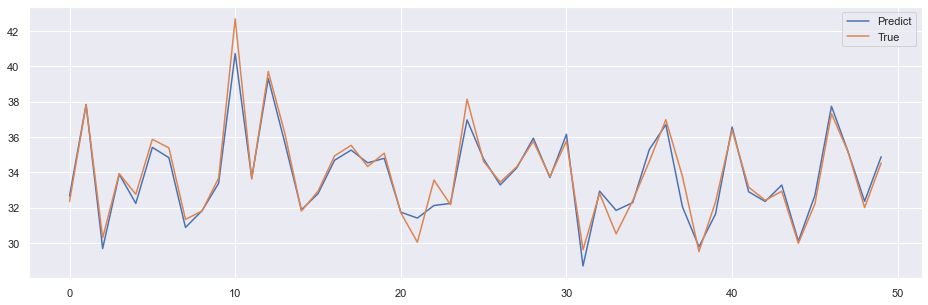

In [150]:
pd.DataFrame({"Predict": predict[:50], "True": np.array(y_test[:50])}).plot();